<a href="https://colab.research.google.com/github/joshimohitm9/Feature-Engineering/blob/main/Column_Transformer_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

link="https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day28-column-transformer/covid_toy.csv"

In [ ]:
df=pd.read_csv(link)
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [ ]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [ ]:
df.describe()

,age,fever
count,100.000000,90.000000
mean,44.220000,100.844444
std,24.878931,2.054926
min,5.000000,98.000000
25%,20.000000,99.000000
50%,45.000000,101.000000
75%,66.500000,102.750000
max,84.000000,104.000000


<Axes: xlabel='age', ylabel='Density'>

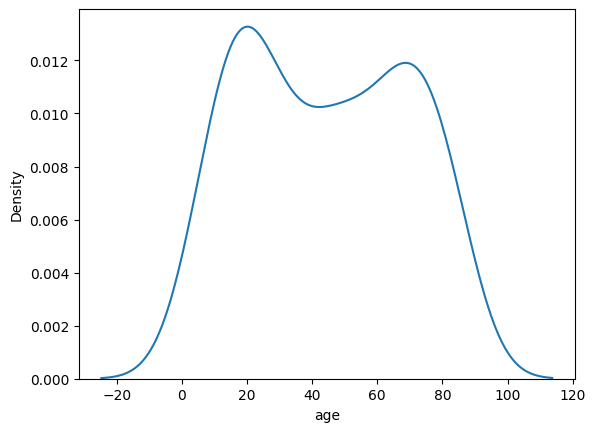

In [ ]:
import seaborn as sns
sns.kdeplot(df.age)

In [ ]:
df.sample(5)

,age,gender,fever,cough,city,has_covid
43,22,Female,99.0,Mild,Bangalore,Yes
7,20,Female,NaN,Strong,Mumbai,Yes
14,51,Male,104.0,Mild,Bangalore,No
5,84,Female,NaN,Mild,Bangalore,Yes
82,24,Male,98.0,Mild,Kolkata,Yes


In [ ]:
df["cough"].unique()

array(['Mild', 'Strong'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer

x=df.drop(["has_covid"],axis=1)
y=df["has_covid"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)
ohe_gender=OneHotEncoder(drop="first")
oe_cough=OrdinalEncoder(categories=[['Mild', 'Strong']])
ohe_city=OneHotEncoder(drop="first")
si_fever=SimpleImputer()
le=LabelEncoder()

# AAM ZINDAGI
x_train_fever=si_fever.fit_transform(x_train[["fever"]])
x_test_fever=si_fever.fit_transform(x_test[["fever"]])

x_train_cough=oe_cough.fit_transform(x_train[["cough"]])
x_test_cough=oe_cough.fit_transform(x_test[["cough"]])

x_train_gender=ohe_gender.fit_transform(x_train[["gender"]]).toarray()
x_test_gender=ohe_gender.fit_transform(x_test[["gender"]]).toarray()

x_train_city=ohe_city.fit_transform(x_train[["city"]]).toarray()
x_test_city=ohe_city.fit_transform(x_test[["city"]]).toarray()

y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

x_train_age = x_train.drop(columns=['gender','fever','cough','city']).values

x_test_age = x_test.drop(columns=['gender','fever','cough','city']).values

import numpy as np

In [ ]:
x_train.city.unique()

array(['Kolkata', 'Bangalore', 'Mumbai', 'Delhi'], dtype=object)

In [ ]:
x_train_transformed

array([[ 24.        ,   0.        ,   1.        ,   0.        ,
          0.        ,  98.        ,   1.        ],
       [ 83.        ,   0.        ,   1.        ,   0.        ,
          0.        , 103.        ,   1.        ],
       [ 66.        ,   0.        ,   0.        ,   0.        ,
          1.        ,  99.        ,   1.        ],
       [ 11.        ,   0.        ,   0.        ,   0.        ,
          0.        , 100.        ,   1.        ],
       [ 51.        ,   0.        ,   0.        ,   0.        ,
          0.        , 104.        ,   1.        ],
       [ 38.        ,   0.        ,   0.        ,   0.        ,
          0.        , 101.        ,   0.        ],
       [ 11.        ,   0.        ,   1.        ,   0.        ,
          1.        , 100.        ,   0.        ],
       [ 25.        ,   0.        ,   0.        ,   0.        ,
          0.        , 104.        ,   1.        ],
       [ 81.        ,   0.        ,   0.        ,   1.        ,
          1.    

In [ ]:
x_train_transformed=np.concatenate((x_train_age,x_train_city,x_train_cough,x_train_fever,x_train_gender),axis=1)
x_test_transformed=np.concatenate((x_test_age,x_test_city,x_test_cough,x_test_fever,x_test_gender),axis=1)

x_train_transformed=pd.DataFrame(x_train_transformed)
x_test_transformed=pd.DataFrame(x_test_transformed)


In [ ]:
x_train_transformed


,0,1,2,3,4,5,6
0,24.0,0.0,1.0,0.0,0.0,98.000000,1.0
1,83.0,0.0,1.0,0.0,0.0,103.000000,1.0
2,66.0,0.0,0.0,0.0,1.0,99.000000,1.0
3,11.0,0.0,0.0,0.0,0.0,100.000000,1.0
4,51.0,0.0,0.0,0.0,0.0,104.000000,1.0
...,...,...,...,...,...,...,...
75,69.0,0.0,0.0,0.0,0.0,102.000000,0.0
76,71.0,0.0,1.0,0.0,1.0,98.000000,0.0
77,71.0,0.0,1.0,0.0,1.0,100.819444,1.0
78,60.0,0.0,0.0,1.0,0.0,99.000000,0.0


In [ ]:
# mentos Zindagi
from sklearn.compose import ColumnTransformer

transformer=ColumnTransformer(transformers=[
    ("tnf1",OneHotEncoder(drop="first"),["gender"]),
    ("tnf2",OrdinalEncoder(categories=[['Mild', 'Strong']]),["cough"]),
    ("tnf3",OneHotEncoder(drop="first"),["city"]),
    ("tnf4",SimpleImputer(),["fever"])
],remainder="passthrough")

x_train_column_tranformer=transformer.fit_transform(x_train)
x_train_column_tranformer=pd.DataFrame(x_train_column_tranformer)

In [ ]:
x_train_column_tranformer

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,1.0,0.0,98.000000,24.0
1,1.0,0.0,0.0,1.0,0.0,103.000000,83.0
2,1.0,1.0,0.0,0.0,0.0,99.000000,66.0
3,1.0,0.0,0.0,0.0,0.0,100.000000,11.0
4,1.0,0.0,0.0,0.0,0.0,104.000000,51.0
...,...,...,...,...,...,...,...
75,0.0,0.0,0.0,0.0,0.0,102.000000,69.0
76,0.0,1.0,0.0,1.0,0.0,98.000000,71.0
77,1.0,1.0,0.0,1.0,0.0,100.819444,71.0
78,0.0,0.0,0.0,0.0,1.0,99.000000,60.0
